# MNIST

In [93]:
import matplotlib.pyplot as plt

In [94]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [95]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [96]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [97]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [98]:
X, y = mnist.data, mnist.target

In [99]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [100]:
X.shape

(70000, 784)

In [101]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [102]:
y.shape

(70000,)

In [103]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = "binary")
    plt.axis("off")

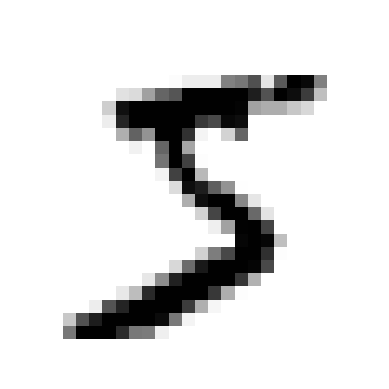

In [104]:
plot_digit(X[0])
plt.show()

In [105]:
y[0]

'5'

In [106]:
X_train, X_test, y_train, y_test = X[:6000], X[:1000], y[:6000], y[:1000]

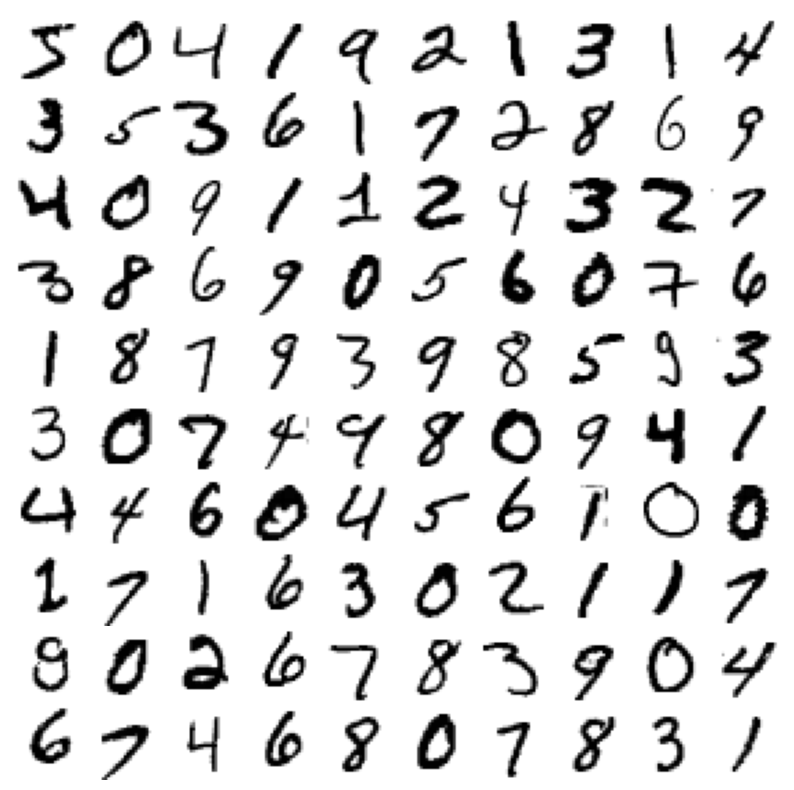

In [107]:
plt.figure(figsize = (10, 10))
for i, image in enumerate(X[:100]):
    plt.subplot(10, 10, i + 1)
    plot_digit(image)
plt.subplots_adjust(wspace= 0, hspace = 0)
save_fig("digits", tight_layout=False)
plt.show()

## Training Binary Classifier

In [108]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [109]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [110]:
sgd_clf.predict([X[0]])

array([ True])

## Performance Measures

In [111]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.962 , 0.956 , 0.9665])

In [112]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [113]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.914 , 0.9145, 0.9145])

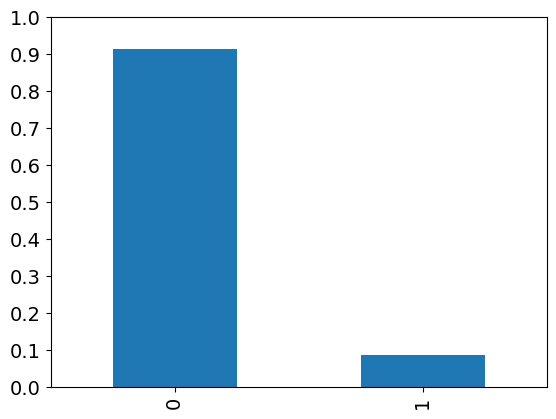

In [114]:
# Extra code - visualization desbalanced data
import pandas as pd
import numpy as np
y_train_5_df = pd.DataFrame(y_train_5.astype(int))
fq = y_train_5_df.iloc[:,0].value_counts()
fq.replace(fq.values, fq.values / sum(fq.values), inplace= True)
fq.plot(kind = 'bar')
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel(None)
plt.show()

In [115]:
del y_train_5_df, fq

### Implementing Cross-Validation

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3) # add shuffle=True if the dataset is
                                        # not already shuffled

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_sgd = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_5_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_5_folds = y_train_5[test_index]

    clone_sgd.fit(X_train_folds, y_train_5_folds)
    y_pred = clone_sgd.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_5_folds)
    print(n_correct / len(y_test_5_folds))

0.962
0.956
0.9665


### Cross-Validation Predict

In [117]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [118]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[5375,  111],
       [ 120,  394]], dtype=int64)

In [119]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[5486,    0],
       [   0,  514]], dtype=int64)

### Precision and Recall

In [120]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7801980198019802

In [121]:
# extra code – this cell also computes the precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.7801980198019802

In [122]:
recall_score(y_train_5, y_train_pred)

0.7665369649805448

In [123]:
# extra code – this cell also computes the recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.7665369649805448

In [124]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7733071638861629

In [125]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7733071638861629

### Precision / Recall trade-off

In [126]:
y_scores = sgd_clf.decision_function([X[0]])
y_scores

array([38042.34312442])

In [127]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [128]:
threshold = 40000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [129]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, 
                             method = "decision_function")

In [130]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

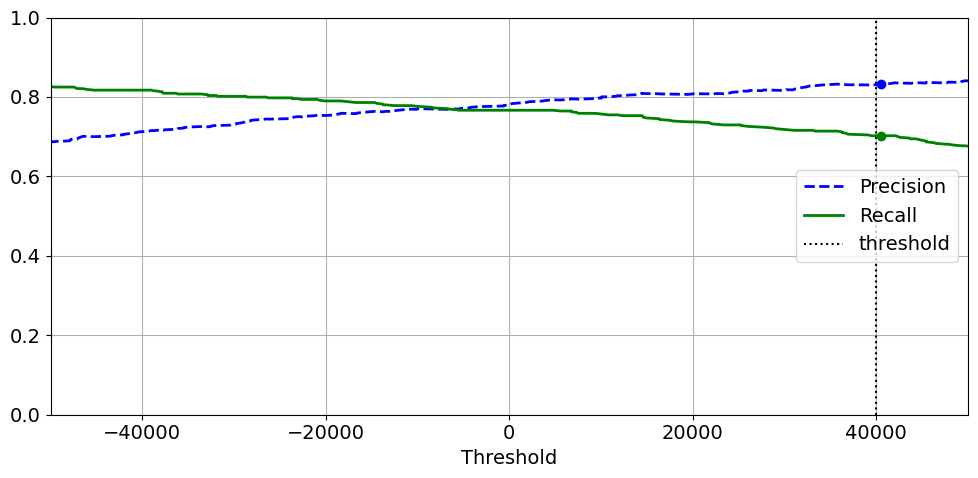

In [131]:
plt.figure(figsize = (10, 5))
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall", linewidth = 2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label = "threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
save_fig("precision_recall_vs_threshold_plot")

plt.show()

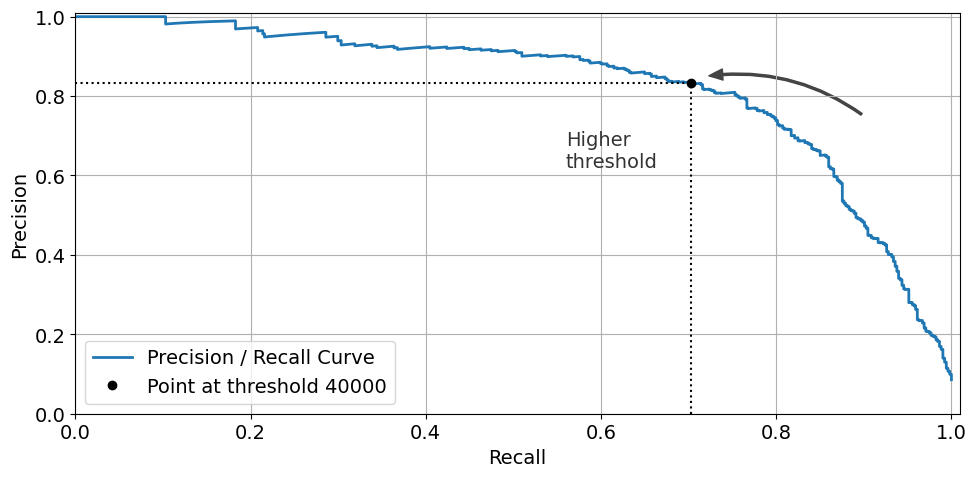

In [132]:
import matplotlib.patches as patches

plt.figure(figsize = (10, 5))
plt.plot(recalls, precisions, linewidth = 2, label = "Precision / Recall Curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label= f"Point at threshold {threshold}")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.90, 0.75), (0.72, 0.85),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.grid()
plt.legend(loc="lower left")
save_fig("precision_vs_recall_plot")

plt.show()

In [133]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

105660.23702487054

In [134]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [135]:
precision_score(y_train_5, y_train_pred_90)

0.9012345679012346

In [136]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.5680933852140078

### The ROC Curve

In [137]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [138]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

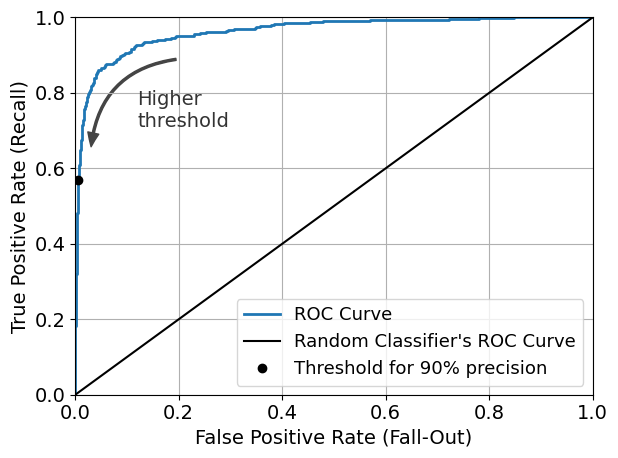

In [139]:
plt.plot(fpr, tpr, linewidth = 2, label = "ROC Curve")
plt.plot([0, 1], [0, 1], 'k', label = "Random Classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90], "ko", label = "Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.03, 0.65),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [140]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9641599203348885

In [141]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)

In [142]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, 
                             method = "predict_proba")

In [143]:
y_probas_forest[:2]

array([[0.37, 0.63],
       [0.98, 0.02]])

These are _estimated probabilities_. Among the images that the model classified as positive with a probability between 50% and 60%, there are actually about 94% positive images:

In [144]:
# Not in the code
idx_50_to_60 = (y_probas_forest[:, 1] > 0.50) & (y_probas_forest[:, 1] < 0.60)
print(f"{(y_train_5[idx_50_to_60]).sum() / idx_50_to_60.sum():.1%}")

93.9%


In [145]:
y_scores_forest = y_probas_forest[:,1]
precisions_forest, recalls_forest, threshold_forest = precision_recall_curve(y_train_5, y_scores_forest)

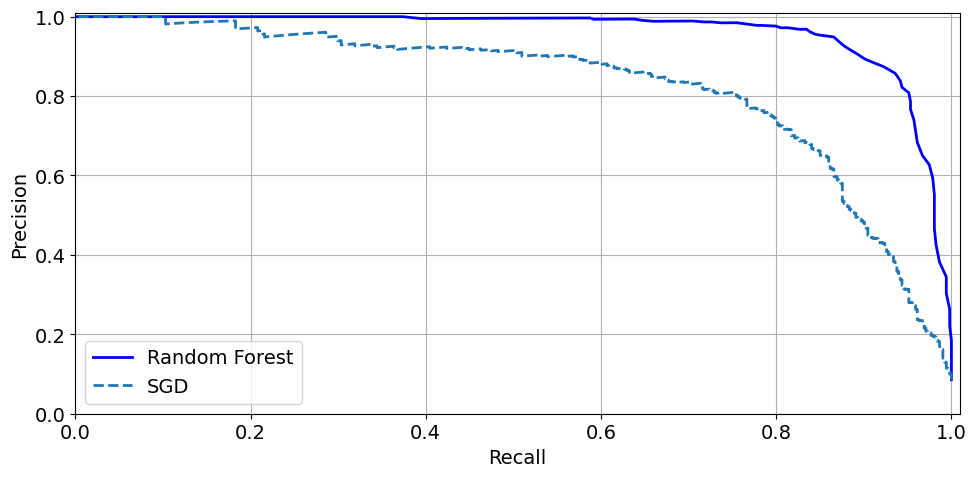

In [146]:
plt.figure(figsize = (10, 5))
plt.plot(recalls_forest, precisions_forest, "b", linewidth = 2, label = "Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1.01, 0, 1.01])
plt.legend(loc = "lower left")
plt.grid()
save_fig("pr_curve_comparison_plot")

plt.show()

In [147]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  #positive proba >= 50%
f1_score(y_train_5, y_train_pred_forest)

0.8105625717566016

In [148]:
roc_auc_score(y_train_5, y_scores_forest)

0.9936162229715256

In [149]:
precision_score(y_train_5, y_train_pred_forest)

0.988795518207283

In [150]:
recall_score(y_train_5, y_train_pred_forest)

0.6867704280155642

## Multiclass Classification

In [151]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 42)
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [152]:
svm_clf.predict([X[0]])

array(['5'], dtype=object)

In [153]:
some_digit_scores = svm_clf.decision_function([X[0]])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [154]:
class_id = some_digit_scores.argmax()
class_id

5

In [155]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [156]:
svm_clf.classes_[class_id]

'5'

In [157]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [158]:
ovr_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [159]:
len(ovr_clf.estimators_)

10

In [160]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [161]:
sgd_clf.predict([X[0]])

array(['5'], dtype='<U1')

In [162]:
sgd_clf.decision_function([X[0]]).round()

array([[-735712., -857058., -281086.,    8290., -616793.,   29040.,
        -492305., -834395., -318385., -363474.]])

In [163]:
cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")

array([0.8565, 0.8715, 0.8635])

In [164]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8705, 0.8985, 0.8925])

## Error Analysis

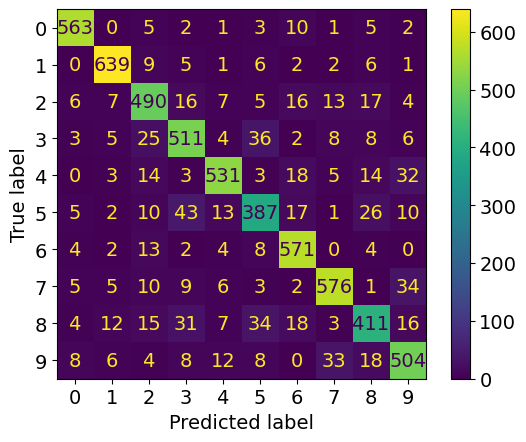

In [165]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

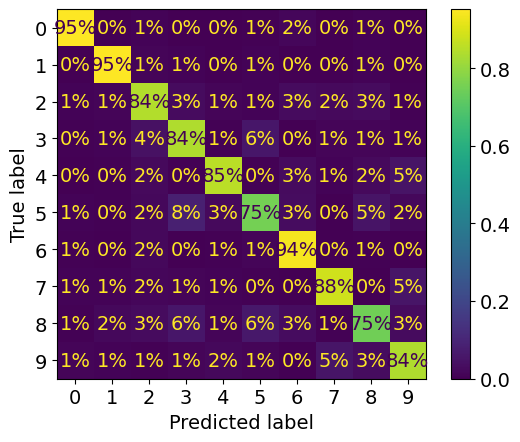

In [166]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format = ".0%")
plt.show()

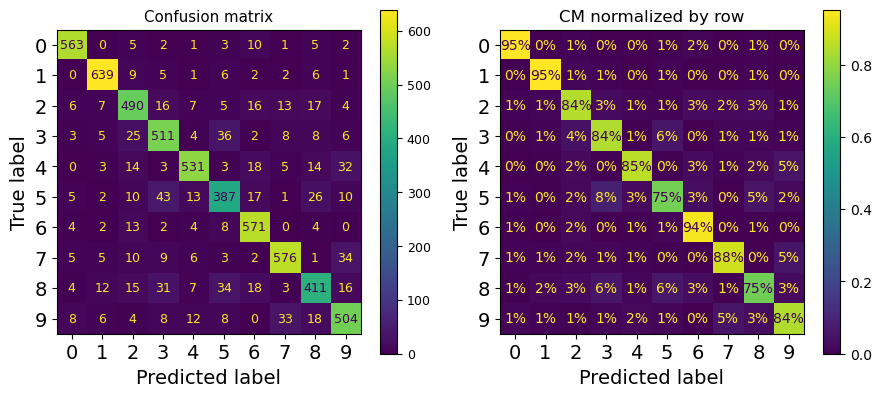

In [167]:
# extra code – this cell generates and saves Figure 3–9
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
save_fig("confusion_matrix_plot_1")
plt.show()

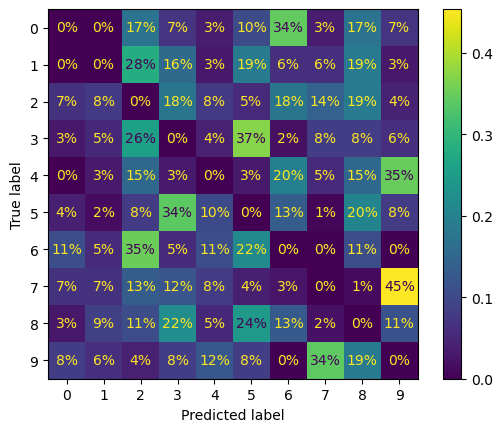

In [168]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, 
                                        sample_weight = sample_weight,
                                        normalize = "true", 
                                        values_format = ".0%")
plt.show()

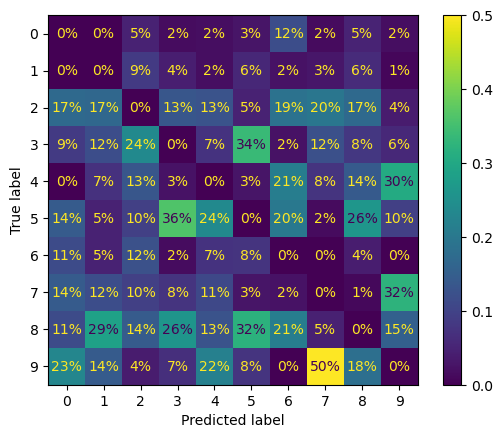

In [169]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight = sample_weight,
                                        normalize = "pred", values_format = ".0%")
plt.show()

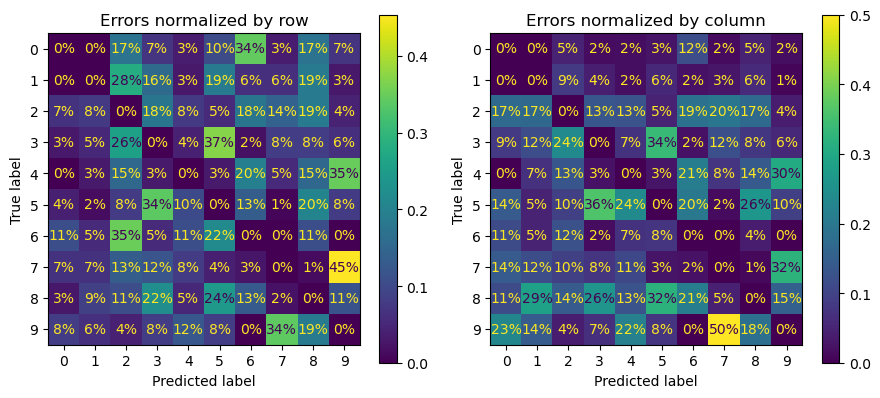

In [170]:
# extra code – this cell generates and saves Figure 3–10
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[0],
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, ax=axs[1],
                                        sample_weight=sample_weight,
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
save_fig("confusion_matrix_plot_2")
plt.show()
plt.rc('font', size=14)  # make fonts great again

In [171]:
cl_a, cl_b = '3', '5'
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

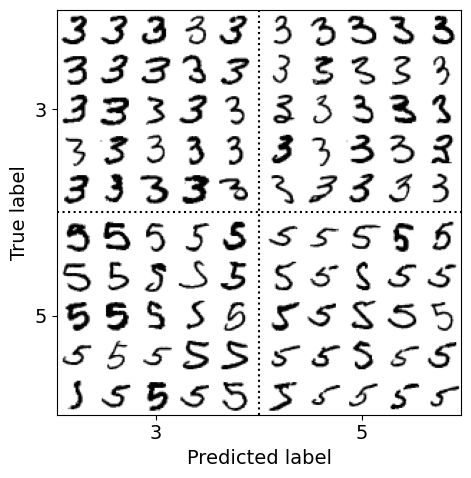

In [172]:
# extra code – this cell generates and saves Figure 3–11
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
save_fig("error_analysis_digits_plot")
plt.show()

## Multilabel Classification

In [92]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [173]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [174]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [175]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = "macro")

0.9500922726736858

In [176]:
f1_score(y_multilabel, y_train_knn_pred, average="weighted")

0.9529944300252725

In [177]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [178]:
chain_clf.predict([X[0]])

array([[0., 1.]])

## Multioutput Classification

In [182]:
np.random.seed(42)
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise 
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

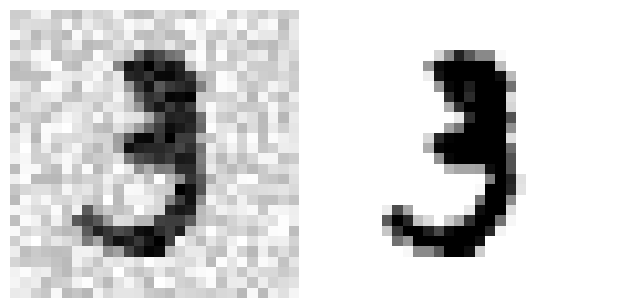

In [187]:
plt.subplot(121); plot_digit(X_test_mod[10])
plt.subplot(122); plot_digit(y_test_mod[10])
save_fig("noisy_digit_example_plot")
plt.show()

In [184]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

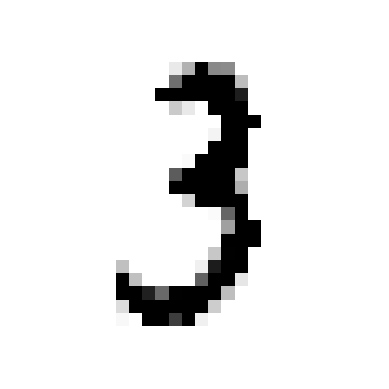

In [186]:
clean_digit = knn_clf.predict([X_test_mod[10]])
plot_digit(clean_digit)
plt.show()

# Exercises

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [211]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.954

In [229]:
grid_params = [
    { 'weights' : ["uniform", "distance"], 'n_neighbors' : [3, 4, 5, 7, 9]}
]

In [230]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid = grid_params,
                           cv = 3,
                           scoring = "accuracy")

grid_search.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [231]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [232]:
grid_search.best_score_

0.9326666666666666

In [228]:
grid_search.best_estimator_.fit(X_train, y_train)
grid_search.best_estimator_.score(X_test, y_test)

1.0

2.  Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

In [267]:
def shift_image(image : np.ndarray, dir : str, n_pixels : int):
    img = image.reshape(28, 28).copy()
    rows, cols = img.shape
    if dir == "left":
        pass
    elif dir == "right":
        pass
    elif dir == "up":
        pass
    elif dir == "down":
        pass
    else: 
        raise ValueError("Choose a correct address!")
    return img